In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import plotly.graph_objects as go

In [20]:
dim_campaigns = pd.read_csv('dim_campaigns.csv')
#pd.to_datetime(dim_campaigns.end_date, format="%d-%m-%Y")

In [21]:
dim_campaigns.start_date

0    12-11-2023
1    10-01-2024
Name: start_date, dtype: object

In [22]:
dim_campaigns['end_date'] = pd.to_datetime(dim_campaigns.end_date, format="%d-%m-%Y")
dim_campaigns['start_date'] = pd.to_datetime(dim_campaigns.start_date.str.strip(), format="%d-%m-%Y")


In [23]:
dim_products = pd.read_csv('dim_products.csv')
dim_stores = pd.read_csv('dim_stores.csv')
fact_events = pd.read_csv('fact_events.csv')

In [24]:
dim_products

,product_code,product_name,category
0,P01,Atliq_Masoor_Dal (1KG),Grocery & Staples
1,P02,Atliq_Sonamasuri_Rice (10KG),Grocery & Staples
2,P03,Atliq_Suflower_Oil (1L),Grocery & Staples
3,P04,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples
4,P05,Atliq_Scrub_Sponge_For_Dishwash,Home Care
5,P06,Atliq_Fusion_Container_Set_of_3,Home Care
6,P09,Atliq_Body_Milk_Nourishing_Lotion (120ML),Personal Care
7,P10,Atliq_Cream_Beauty_Bathing_Soap (125GM),Personal Care
8,P13,Atliq_High_Glo_15W_LED_Bulb,Home Appliances
9,P14,Atliq_waterproof_Immersion_Rod,Home Appliances


In [25]:
dim_campaigns

,campaign_id,campaign_name,start_date,end_date
0,CAMP_DIW_01,Diwali,2023-11-12,2023-11-18
1,CAMP_SAN_01,Sankranti,2024-01-10,2024-01-16


In [26]:
dim_stores

,store_id,city
0,STTRV-0,Trivandrum
1,STMDU-3,Madurai
2,STHYD-6,Hyderabad
3,STVSK-1,Visakhapatnam
4,STCBE-3,Coimbatore
5,STBLR-8,Bengaluru
6,STBLR-2,Bengaluru
7,STCHE-7,Chennai
8,STCBE-0,Coimbatore
9,STVSK-0,Visakhapatnam


In [27]:
fact_events

,event_id,store_id,campaign_id,product_code,base_price,promo_type,quantity_sold(before_promo),quantity_sold(after_promo)
0,7f650b,STCBE-2,CAMP_SAN_01,P11,190,50% OFF,34,52
1,a21f91,STBLR-8,CAMP_DIW_01,P03,156,25% OFF,393,322
2,78bc80,STVJD-0,CAMP_SAN_01,P07,300,BOGOF,22,85
3,a1503f,STCBE-1,CAMP_DIW_01,P15,3000,500 Cashback,329,1000
4,1091cf,STBLR-6,CAMP_DIW_01,P05,55,25% OFF,108,93
...,...,...,...,...,...,...,...,...
1495,1e8961,STBLR-3,CAMP_SAN_01,P12,62,50% OFF,61,84
1496,f957f1,STMDU-1,CAMP_SAN_01,P10,50,25% OFF,22,18
1497,a9ae21,STCBE-0,CAMP_DIW_01,P12,62,50% OFF,80,119
1498,e5d28d,STVSK-0,CAMP_SAN_01,P13,350,BOGOF,73,282


In [28]:
fact_events.promo_type.unique()

array(['50% OFF', '25% OFF', 'BOGOF', '500 Cashback', '33% OFF'],
      dtype=object)

In [29]:
fact_events['revenue(before_promo)'] = fact_events['quantity_sold(before_promo)'] * fact_events.base_price

In [30]:
fact_events

,event_id,store_id,campaign_id,product_code,base_price,promo_type,quantity_sold(before_promo),quantity_sold(after_promo),revenue(before_promo)
0,7f650b,STCBE-2,CAMP_SAN_01,P11,190,50% OFF,34,52,6460
1,a21f91,STBLR-8,CAMP_DIW_01,P03,156,25% OFF,393,322,61308
2,78bc80,STVJD-0,CAMP_SAN_01,P07,300,BOGOF,22,85,6600
3,a1503f,STCBE-1,CAMP_DIW_01,P15,3000,500 Cashback,329,1000,987000
4,1091cf,STBLR-6,CAMP_DIW_01,P05,55,25% OFF,108,93,5940
...,...,...,...,...,...,...,...,...,...
1495,1e8961,STBLR-3,CAMP_SAN_01,P12,62,50% OFF,61,84,3782
1496,f957f1,STMDU-1,CAMP_SAN_01,P10,50,25% OFF,22,18,1100
1497,a9ae21,STCBE-0,CAMP_DIW_01,P12,62,50% OFF,80,119,4960
1498,e5d28d,STVSK-0,CAMP_SAN_01,P13,350,BOGOF,73,282,25550


In [31]:
quantity_sold_after_promo = []
for i in fact_events.index:
    if fact_events.loc[i,'promo_type'] == 'BOGOF':
        quantity_sold_after_promo.append(fact_events.loc[i,'quantity_sold(after_promo)'] * 2)
    else:
        quantity_sold_after_promo.append(fact_events.loc[i,'quantity_sold(after_promo)'])

In [32]:
fact_events['quantity_sold(after_promo)'] = quantity_sold_after_promo
fact_events

,event_id,store_id,campaign_id,product_code,base_price,promo_type,quantity_sold(before_promo),quantity_sold(after_promo),revenue(before_promo)
0,7f650b,STCBE-2,CAMP_SAN_01,P11,190,50% OFF,34,52,6460
1,a21f91,STBLR-8,CAMP_DIW_01,P03,156,25% OFF,393,322,61308
2,78bc80,STVJD-0,CAMP_SAN_01,P07,300,BOGOF,22,170,6600
3,a1503f,STCBE-1,CAMP_DIW_01,P15,3000,500 Cashback,329,1000,987000
4,1091cf,STBLR-6,CAMP_DIW_01,P05,55,25% OFF,108,93,5940
...,...,...,...,...,...,...,...,...,...
1495,1e8961,STBLR-3,CAMP_SAN_01,P12,62,50% OFF,61,84,3782
1496,f957f1,STMDU-1,CAMP_SAN_01,P10,50,25% OFF,22,18,1100
1497,a9ae21,STCBE-0,CAMP_DIW_01,P12,62,50% OFF,80,119,4960
1498,e5d28d,STVSK-0,CAMP_SAN_01,P13,350,BOGOF,73,564,25550


In [33]:
revenue_after_promo = []
for i in fact_events.index:
    if fact_events.loc[i,'promo_type'] == '50% OFF':
        revenue_after_promo.append((fact_events.loc[i,'base_price']*fact_events.loc[i,'quantity_sold(after_promo)'])*(1/2))
    elif fact_events.loc[i,'promo_type'] == '25% OFF':
        revenue_after_promo.append((fact_events.loc[i,'base_price']*fact_events.loc[i,'quantity_sold(after_promo)'])*(75/100))
    elif fact_events.loc[i,'promo_type'] == '500 Cashback':
        revenue_after_promo.append(((fact_events.loc[i,'base_price']-500)*fact_events.loc[i,'quantity_sold(after_promo)']))
    elif fact_events.loc[i,'promo_type'] == '33% OFF':
        revenue_after_promo.append((fact_events.loc[i,'base_price']*fact_events.loc[i,'quantity_sold(after_promo)'])*(67/100))
    else:
        revenue_after_promo.append((fact_events.loc[i,'base_price']*.5*fact_events.loc[i,'quantity_sold(after_promo)']))



In [34]:
fact_events['revenue(after_promo)'] = revenue_after_promo

In [35]:
fact_events

,event_id,store_id,campaign_id,product_code,base_price,promo_type,quantity_sold(before_promo),quantity_sold(after_promo),revenue(before_promo),revenue(after_promo)
0,7f650b,STCBE-2,CAMP_SAN_01,P11,190,50% OFF,34,52,6460,4940.00
1,a21f91,STBLR-8,CAMP_DIW_01,P03,156,25% OFF,393,322,61308,37674.00
2,78bc80,STVJD-0,CAMP_SAN_01,P07,300,BOGOF,22,170,6600,25500.00
3,a1503f,STCBE-1,CAMP_DIW_01,P15,3000,500 Cashback,329,1000,987000,2500000.00
4,1091cf,STBLR-6,CAMP_DIW_01,P05,55,25% OFF,108,93,5940,3836.25
...,...,...,...,...,...,...,...,...,...,...
1495,1e8961,STBLR-3,CAMP_SAN_01,P12,62,50% OFF,61,84,3782,2604.00
1496,f957f1,STMDU-1,CAMP_SAN_01,P10,50,25% OFF,22,18,1100,675.00
1497,a9ae21,STCBE-0,CAMP_DIW_01,P12,62,50% OFF,80,119,4960,3689.00
1498,e5d28d,STVSK-0,CAMP_SAN_01,P13,350,BOGOF,73,564,25550,98700.00


In [36]:
fact_events['incremental_revenue'] = fact_events['revenue(after_promo)'] - fact_events['revenue(before_promo)']

In [37]:
fact_events['incremental_units_sold'] = fact_events['quantity_sold(after_promo)'] - fact_events['quantity_sold(before_promo)']

In [38]:
fact_events

,event_id,store_id,campaign_id,product_code,base_price,promo_type,quantity_sold(before_promo),quantity_sold(after_promo),revenue(before_promo),revenue(after_promo),incremental_revenue,incremental_units_sold
0,7f650b,STCBE-2,CAMP_SAN_01,P11,190,50% OFF,34,52,6460,4940.00,-1520.00,18
1,a21f91,STBLR-8,CAMP_DIW_01,P03,156,25% OFF,393,322,61308,37674.00,-23634.00,-71
2,78bc80,STVJD-0,CAMP_SAN_01,P07,300,BOGOF,22,170,6600,25500.00,18900.00,148
3,a1503f,STCBE-1,CAMP_DIW_01,P15,3000,500 Cashback,329,1000,987000,2500000.00,1513000.00,671
4,1091cf,STBLR-6,CAMP_DIW_01,P05,55,25% OFF,108,93,5940,3836.25,-2103.75,-15
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1e8961,STBLR-3,CAMP_SAN_01,P12,62,50% OFF,61,84,3782,2604.00,-1178.00,23
1496,f957f1,STMDU-1,CAMP_SAN_01,P10,50,25% OFF,22,18,1100,675.00,-425.00,-4
1497,a9ae21,STCBE-0,CAMP_DIW_01,P12,62,50% OFF,80,119,4960,3689.00,-1271.00,39
1498,e5d28d,STVSK-0,CAMP_SAN_01,P13,350,BOGOF,73,564,25550,98700.00,73150.00,491


In [39]:
fact_events.groupby(['promo_type'])['incremental_revenue'].sum()

promo_type
25% OFF         -3174514.75
33% OFF         -1563356.16
50% OFF          -726663.50
500 Cashback    91053000.00
BOGOF           69316990.00
Name: incremental_revenue, dtype: float64

In [40]:
fact_events.groupby(['promo_type'])['incremental_units_sold'].sum()

promo_type
25% OFF          -5717
33% OFF          27255
50% OFF           6931
500 Cashback     40881
BOGOF           372326
Name: incremental_units_sold, dtype: int64

In [41]:
fact_events.groupby(['store_id'])[['incremental_revenue']].sum().sort_values(by=['incremental_revenue'],ascending=False).head(10)

,incremental_revenue
store_id,
STMYS-1,4919313.54
STCHE-4,4828030.03
STBLR-0,4759623.65
STBLR-7,4717587.33
STCHE-7,4647725.72
STBLR-6,4610220.29
STCHE-3,4408650.33
STMYS-3,4402291.98
STCHE-6,4035845.71


In [42]:
fact_events.groupby(['store_id'])[['incremental_units_sold']].sum().sort_values(by = 'incremental_units_sold' , ascending=True).head(10)

,incremental_units_sold
store_id,
STMLR-0,3978
STVSK-3,4553
STVSK-4,4988
STTRV-1,5072
STVJD-1,5302
STTRV-0,5306
STMLR-2,5374
STMLR-1,5481
STVJD-0,5870


In [43]:
fact_events_with_city = pd.merge(left=fact_events , right=dim_stores , left_on='store_id' , right_on='store_id' , how='inner')

In [44]:
fact_events

,event_id,store_id,campaign_id,product_code,base_price,promo_type,quantity_sold(before_promo),quantity_sold(after_promo),revenue(before_promo),revenue(after_promo),incremental_revenue,incremental_units_sold
0,7f650b,STCBE-2,CAMP_SAN_01,P11,190,50% OFF,34,52,6460,4940.00,-1520.00,18
1,a21f91,STBLR-8,CAMP_DIW_01,P03,156,25% OFF,393,322,61308,37674.00,-23634.00,-71
2,78bc80,STVJD-0,CAMP_SAN_01,P07,300,BOGOF,22,170,6600,25500.00,18900.00,148
3,a1503f,STCBE-1,CAMP_DIW_01,P15,3000,500 Cashback,329,1000,987000,2500000.00,1513000.00,671
4,1091cf,STBLR-6,CAMP_DIW_01,P05,55,25% OFF,108,93,5940,3836.25,-2103.75,-15
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1e8961,STBLR-3,CAMP_SAN_01,P12,62,50% OFF,61,84,3782,2604.00,-1178.00,23
1496,f957f1,STMDU-1,CAMP_SAN_01,P10,50,25% OFF,22,18,1100,675.00,-425.00,-4
1497,a9ae21,STCBE-0,CAMP_DIW_01,P12,62,50% OFF,80,119,4960,3689.00,-1271.00,39
1498,e5d28d,STVSK-0,CAMP_SAN_01,P13,350,BOGOF,73,564,25550,98700.00,73150.00,491


In [45]:
fact_events_with_city

,event_id,store_id,campaign_id,product_code,base_price,promo_type,quantity_sold(before_promo),quantity_sold(after_promo),revenue(before_promo),revenue(after_promo),incremental_revenue,incremental_units_sold,city
0,7f650b,STCBE-2,CAMP_SAN_01,P11,190,50% OFF,34,52,6460,4940.00,-1520.00,18,Coimbatore
1,a21f91,STBLR-8,CAMP_DIW_01,P03,156,25% OFF,393,322,61308,37674.00,-23634.00,-71,Bengaluru
2,78bc80,STVJD-0,CAMP_SAN_01,P07,300,BOGOF,22,170,6600,25500.00,18900.00,148,Vijayawada
3,a1503f,STCBE-1,CAMP_DIW_01,P15,3000,500 Cashback,329,1000,987000,2500000.00,1513000.00,671,Coimbatore
4,1091cf,STBLR-6,CAMP_DIW_01,P05,55,25% OFF,108,93,5940,3836.25,-2103.75,-15,Bengaluru
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1e8961,STBLR-3,CAMP_SAN_01,P12,62,50% OFF,61,84,3782,2604.00,-1178.00,23,Bengaluru
1496,f957f1,STMDU-1,CAMP_SAN_01,P10,50,25% OFF,22,18,1100,675.00,-425.00,-4,Madurai
1497,a9ae21,STCBE-0,CAMP_DIW_01,P12,62,50% OFF,80,119,4960,3689.00,-1271.00,39,Coimbatore
1498,e5d28d,STVSK-0,CAMP_SAN_01,P13,350,BOGOF,73,564,25550,98700.00,73150.00,491,Visakhapatnam


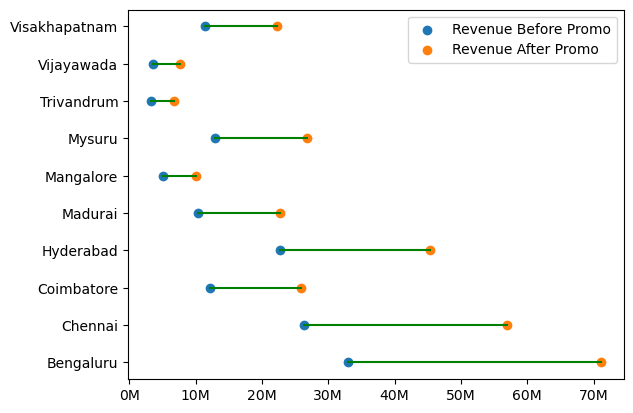

In [46]:
temp = fact_events_with_city.groupby(['city'])[['revenue(before_promo)','revenue(after_promo)']].sum()
y_cordinates = list(range(0, temp.index.size))
plt.scatter(x = temp['revenue(before_promo)'] , y = y_cordinates , label = 'Revenue Before Promo')
plt.legend()
plt.scatter(x = temp['revenue(after_promo)'] , y = y_cordinates, label = 'Revenue After Promo')
plt.legend()
for i in y_cordinates:
    plt.plot([temp.iloc[i,0],temp.iloc[i,1]],[i,i], color = 'green')
plt.yticks(ticks=y_cordinates , labels=temp.index)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x*1e-6:.0f}M'))

In [47]:
top_3_cities_with_highest_incremental_revenue = fact_events_with_city.groupby(['city'])[['incremental_revenue']].sum().\
    sort_values(by=['incremental_revenue'] , ascending=False).head(3).index
    

In [48]:
fact_events_of_top_3_cities_with_highest_incremental_revenue = fact_events_with_city[fact_events_with_city.city.isin(top_3_cities_with_highest_incremental_revenue)]

In [49]:
fact_events_of_top_3_cities_with_highest_incremental_revenue_with_product_category = pd.merge(left = fact_events_of_top_3_cities_with_highest_incremental_revenue, right= dim_products , left_on='product_code' , right_on='product_code' , how = 'inner')

In [50]:
fact_events_of_top_3_cities_with_highest_incremental_revenue_with_product_category.groupby(['city','category'])['incremental_revenue'].sum()

city       category         
Bengaluru  Combo1               22348000.00
           Grocery & Staples     6145412.54
           Home Appliances       6056550.00
           Home Care             3866943.75
           Personal Care         -185556.50
Chennai    Combo1               17962500.00
           Grocery & Staples     4514860.16
           Home Appliances       5284070.00
           Home Care             3134350.00
           Personal Care         -182536.00
Hyderabad  Combo1               12866500.00
           Grocery & Staples     3646621.24
           Home Appliances       3865230.00
           Home Care             2467478.75
           Personal Care         -133137.50
Name: incremental_revenue, dtype: float64

/var/folders/33/fgfnr44574j59mthfrh4nnt80000gn/T/ipykernel_1363/4083286632.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data=fact_events_of_top_3_cities_with_highest_incremental_revenue_with_product_category, hue='category' , x = 'city' , y ='incremental_revenue', ci=False ,estimator='sum')


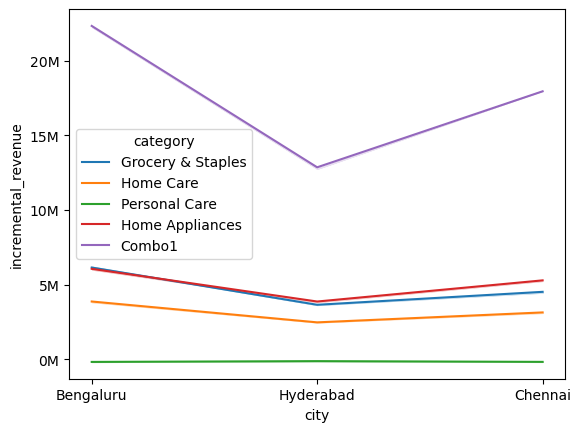

In [51]:
sns.lineplot(data=fact_events_of_top_3_cities_with_highest_incremental_revenue_with_product_category, hue='category' , x = 'city' , y ='incremental_revenue', ci=False ,estimator='sum')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x*1e-6:.0f}M'))

In [52]:
temp = fact_events.groupby(['promo_type'])[['incremental_units_sold','incremental_revenue','quantity_sold(before_promo)']].sum()
temp['ISU%'] = (temp.incremental_units_sold / temp['quantity_sold(before_promo)']) * 100
temp.drop(columns = ['quantity_sold(before_promo)'], inplace=True)
incremental_sold_units_and_incremental_revenue_by_promo_type = temp
incremental_sold_units_and_incremental_revenue_by_promo_type

,incremental_units_sold,incremental_revenue,ISU%
promo_type,,,
25% OFF,-5717,-3174514.75,-12.991115
33% OFF,27255,-1563356.16,43.042593
50% OFF,6931,-726663.50,32.627218
500 Cashback,40881,91053000.00,183.331091
BOGOF,372326,69316990.00,639.955311


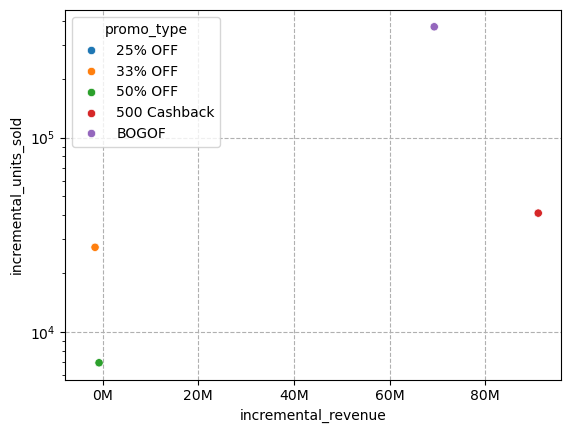

In [53]:
sns.scatterplot(data=incremental_sold_units_and_incremental_revenue_by_promo_type , y = 'incremental_units_sold' , x= 'incremental_revenue' , hue = 'promo_type')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x*1e-6:.0f}M'))
plt.grid(True, linestyle = '--')
plt.yscale('log')
#plt.xticks(ticks=[10000,20000,30000,40000,50000])


In [56]:
fact_events.store_id.unique()

array(['STCBE-2', 'STBLR-8', 'STVJD-0', 'STCBE-1', 'STBLR-6', 'STBLR-4',
       'STVSK-2', 'STHYD-4', 'STCBE-4', 'STMDU-2', 'STMYS-2', 'STHYD-6',
       'STCHE-6', 'STBLR-3', 'STVSK-4', 'STCHE-2', 'STCHE-5', 'STTRV-0',
       'STVSK-1', 'STHYD-5', 'STBLR-0', 'STCHE-4', 'STMDU-3', 'STMYS-0',
       'STMDU-0', 'STMYS-1', 'STVJD-1', 'STHYD-3', 'STBLR-5', 'STHYD-2',
       'STMYS-3', 'STCBE-3', 'STHYD-1', 'STCBE-0', 'STCHE-0', 'STCHE-1',
       'STBLR-9', 'STMLR-1', 'STCHE-3', 'STBLR-1', 'STMLR-0', 'STMLR-2',
       'STVSK-3', 'STMDU-1', 'STCHE-7', 'STTRV-1', 'STVSK-0', 'STBLR-2',
       'STHYD-0', 'STBLR-7'], dtype=object)